<a href="https://colab.research.google.com/github/you-Soft/-Assignment-2-Lexical-Scoping/blob/master/%E7%8E%89%E4%B9%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import pickle
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential # We are using Sequential model to stack layers together
from keras.layers import Dense # We use Dense MLP layers to do final classification
from keras.layers import Conv2D # We use Conv2D to use convolution to extract features
from keras.layers import MaxPool2D # We use MaxPool2D to maxpool feature to get location invariance
from keras.layers import MaxPooling2D # We use MaxPool2D to maxpool feature to get location invariance
from keras.layers import Activation # We use various activation functions to intro non-linearities
from keras.layers import Dropout # To get more robustnes to model by disabling temporaly some of the nodes
from keras.layers import Flatten # We use flatten to convert 2D feature matrices into long vectors for MLP
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.utils import np_utils
from keras.layers import BatchNormalization
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

**Import CIFAR-10 dataset**

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [0]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # features and labels
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

# ????????
cifar10_path = '/content/drive/My Drive/YUNES-1928005/cifar-10-batches-py' # ????
x_train, y_train = load_cfar10_batch(cifar10_path, 1)
for i in range(2, 6):
    features, labels = load_cfar10_batch(cifar10_path, i)
    x_train, y_train = np.concatenate([x_train, features]), np.concatenate([y_train, labels])

# ??????
with open(cifar10_path + '/test_batch', mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    x_test = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    y_test = batch['labels']

** CIFAR-10 dataset classes¶**
The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [0]:
# cifar-10 classes
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Here are the first 10 sample images from the training data. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


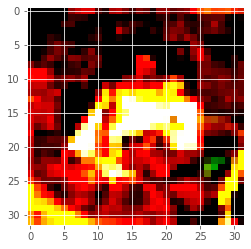

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


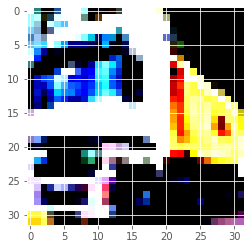

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


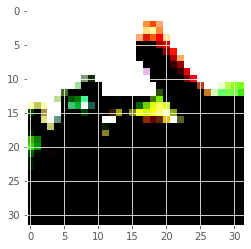

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


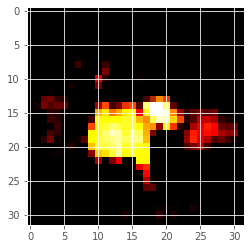

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


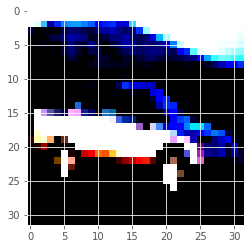

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


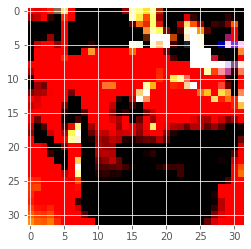

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


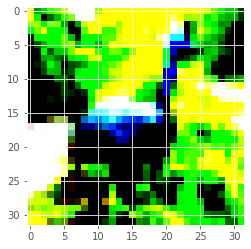

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


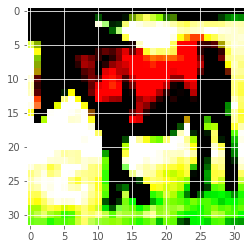

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


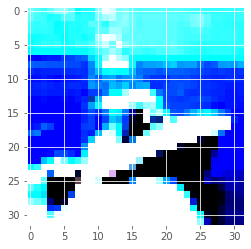

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


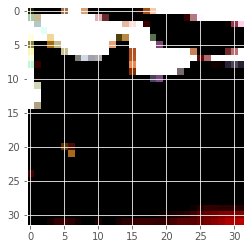

In [141]:
for z in range(10):
    images = X_train[z]
    plt.imshow(images)
    plt.show()

**Preparing the dataset**

We are going to use the deep convolutional neural network to classify the images. Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples

In [0]:
cifar_num_classes = 10
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, cifar_num_classes)
y_test = to_categorical(y_test, cifar_num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Normalize the image data**

A simple way to normalize our data is to scale the pixel values between 0 to 1 range.

In [0]:

# Normalization of pixel values between 0 to 1 range 
X_train /= 255.0
X_test /= 255.0

In [154]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


# ...and to scale it to (-1, 1)
X_train = np.multiply(x_train, 2.0)
X_test = np.multiply(x_test, 2.0)
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)

X_train.shape: (50000, 32, 32, 3)
X_test.shape: (10000, 32, 32, 3)


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
K.clear_session()
weight_decay = 1e-4

**Creating CNN model**

We will use three convolutional layers, each with a kernel size of (3,3) and ReLU activation function. First convolutional layer with 32 filters, second convolutional layer with 64 filters and so on......

**Training of Convolutional Neural Network (CNN) Model**

Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later.

We are going to train the model for 50 epochs.

In [157]:
# TODO: Implement you own model here
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

## Finally, compile the model here 
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.summary()

# Train the model
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

**Training of Convolutional Neural Network (CNN) Model**

Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later.

We are going to train the model for 50 epochs.

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )


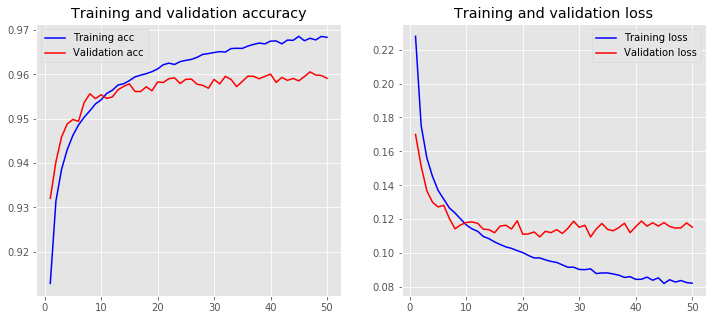

In [159]:
plt.style.use('ggplot')

def plot_history(history):
    acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(model.history)

In [161]:
#save to disk
model_json = model.to_json()
with open('/content/drive/My Drive/YUNES-1928005/Model_玉书_1928005.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('/content/drive/My Drive/YUNES-1928005/Weight_ 玉书_1928005.h5')
scores = model.evaluate(x_test, y_test) # accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 128us/step
Accuracy test: 95.91%


In [162]:
# Compute loss and acc for training and testing
loss_train, acc_train = model.evaluate(x_train, y_train) # TODO: You migh need to change y_train to y_train_cat
loss_test, acc_test = model.evaluate(x_test, y_test) # TODO: You migh need to change y_test to y_test_cat
print('\nLoss: %f/%f Acc: %f/%f' % (loss_train, loss_test, acc_train, acc_test))

10000/10000 [==============================] - 1s 116us/step

Loss: 0.037739/0.115359 Acc: 0.986802/0.959130


In [163]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 1s 74us/step

Test result: 95.913 loss: 0.115
